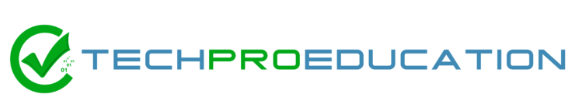

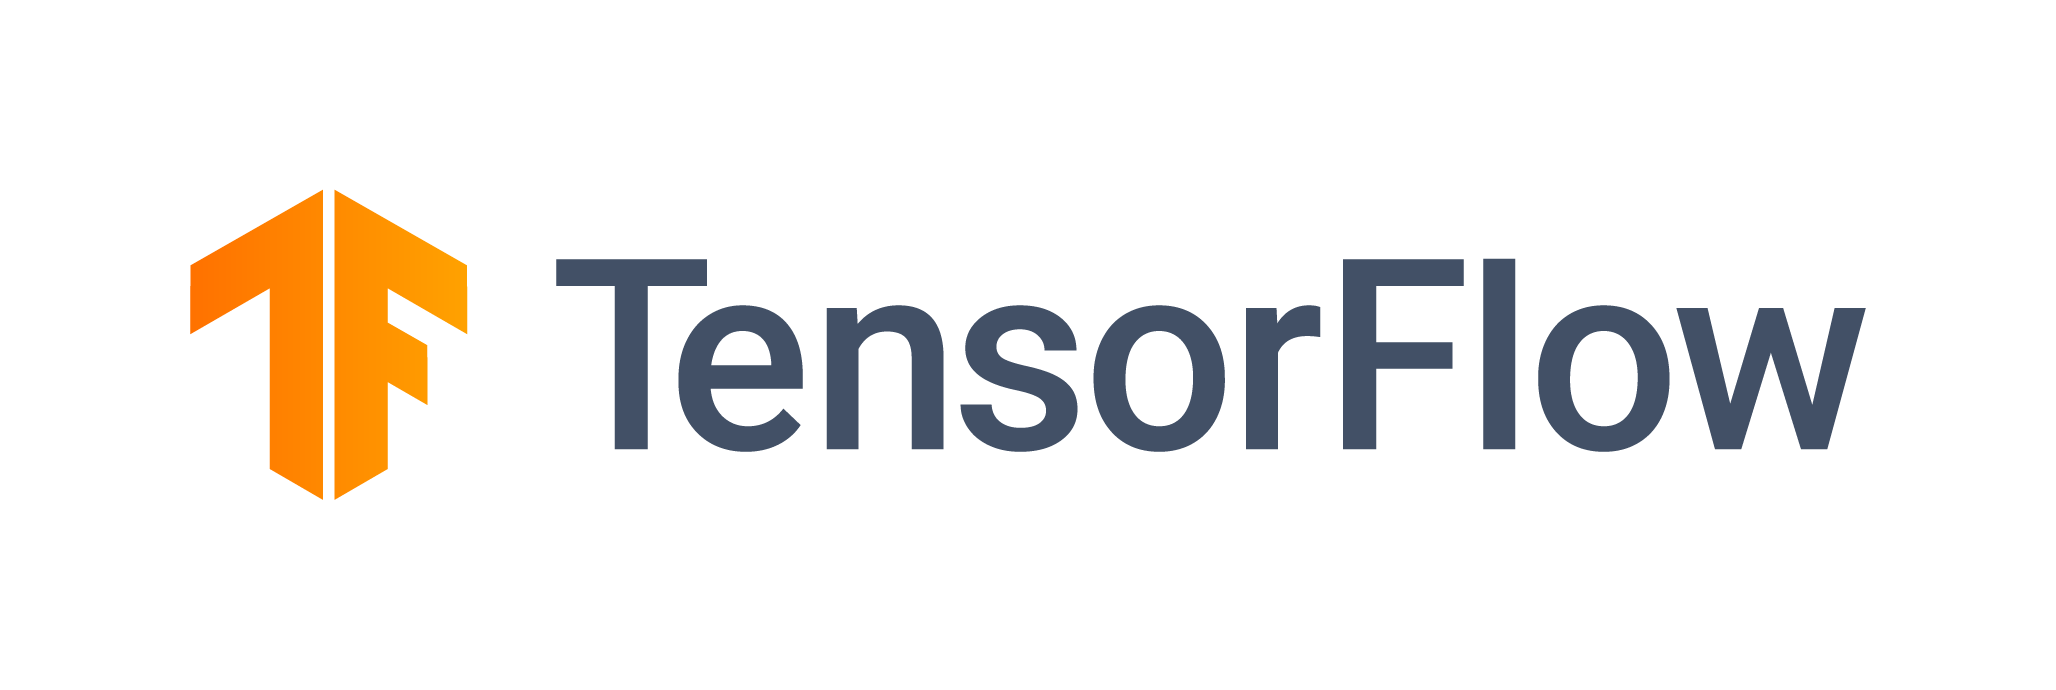

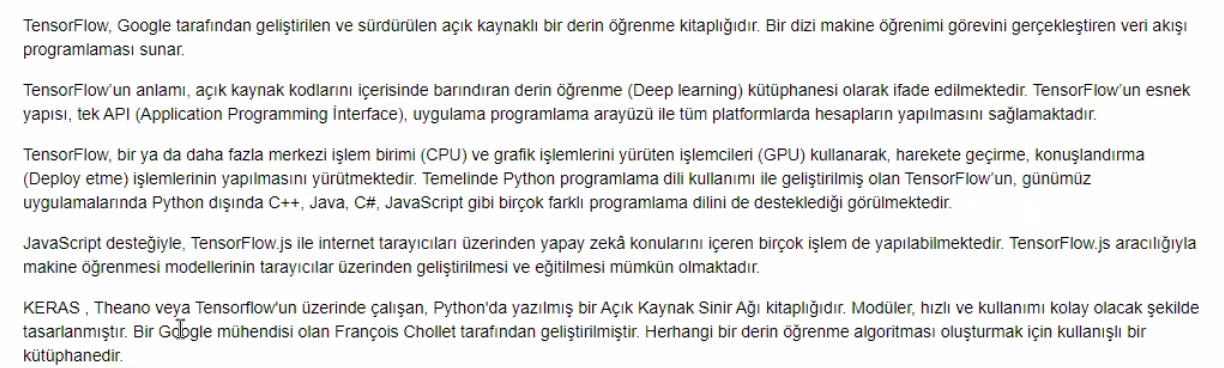

# Installing Tensorflow

In [42]:
# pip install tensorflow

In [43]:
import tensorflow as tf
tf.__version__

'2.10.0'

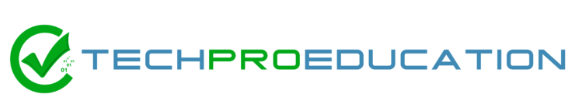

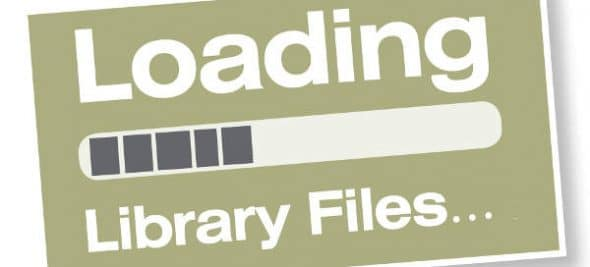

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv("fake_reg.csv")       # sentetik dataset i

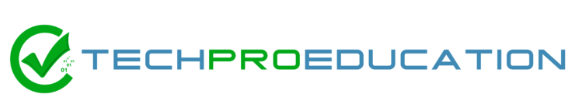

## Exploratory Data Analysis and Visualization

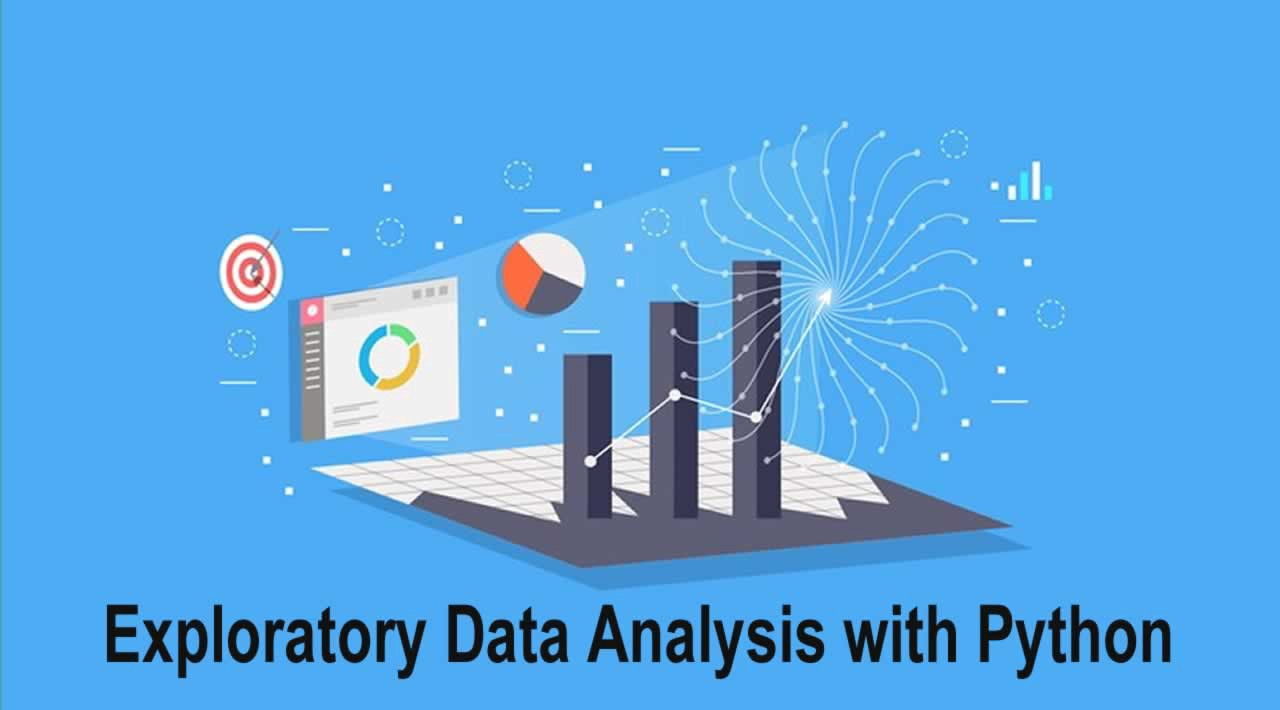

In [46]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [47]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [49]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


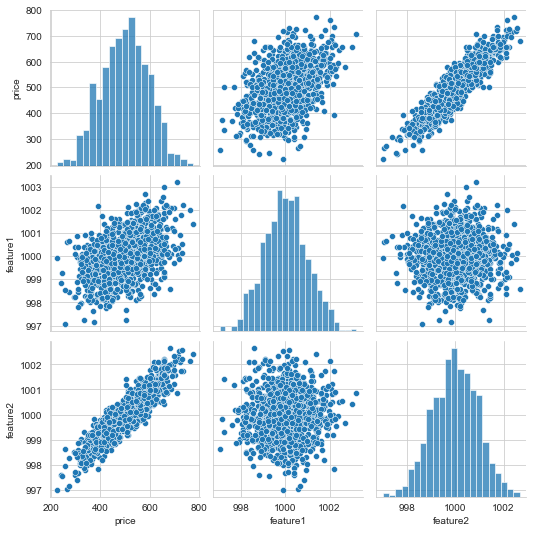

In [51]:
sns.pairplot(df);

In [52]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


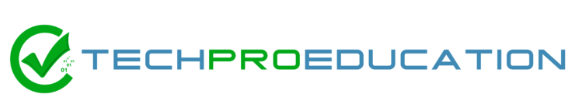

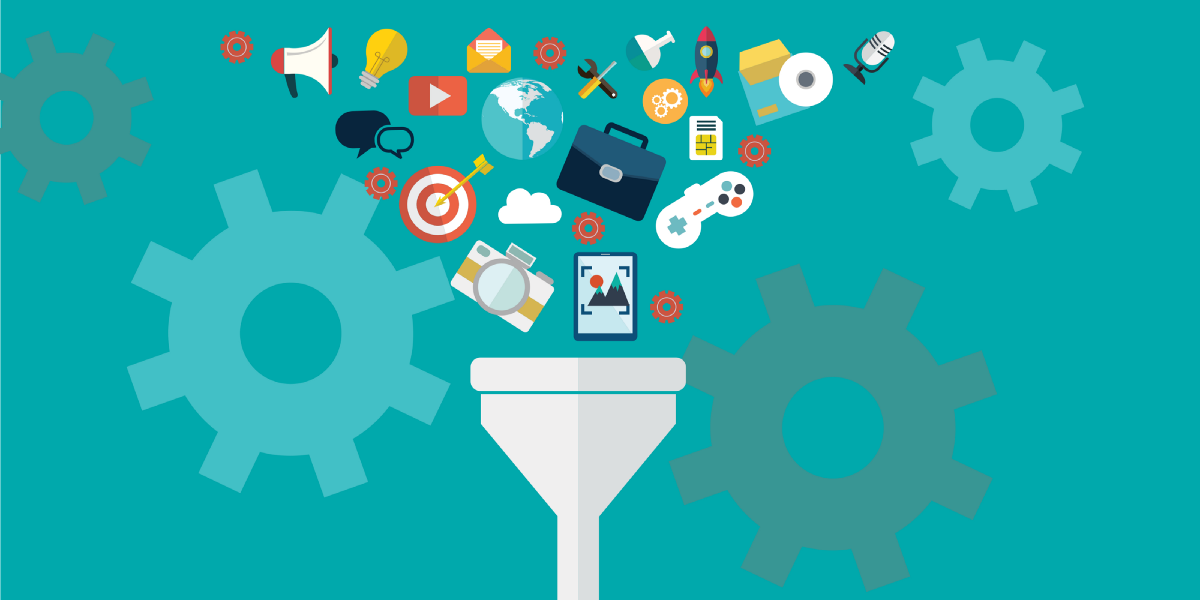

## Preprocessing of Data
- Train | Test Split, Scalling

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df[['feature1', 'feature2']].values  # Önemli! array olarak vereceğiz data setini df olarak vermiyoruz bu nedenle .values ile değerleri alıyoruz
y = df['price'].values                   # values önemli. array de daha hızlı işlem yapılır performans artar

In [55]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [56]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
X_train.shape

(700, 2)

In [59]:
X_test.shape

(300, 2)

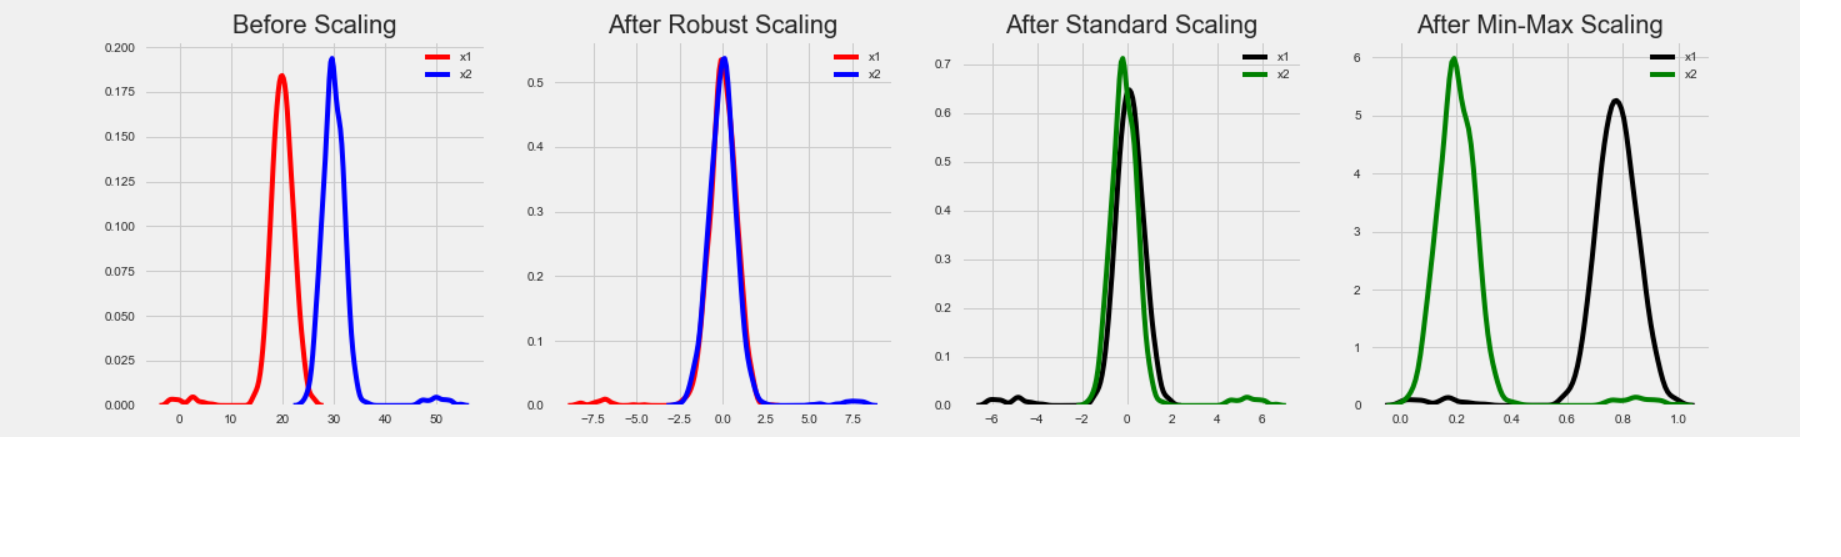

In [60]:
from sklearn.preprocessing import MinMaxScaler   # deep learning de minmax scaler kullanılır. 

In [61]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [62]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [63]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train.max()

1.0

In [65]:
X_train.min()

0.0

In [66]:
X_test.max()   #train datasında scaler yaptığımızdan 0 ile 1 arasında değerler gelir  fakat test datasında 1 den büyük 0 dan küçük değerler olabilir

1.0186515935232023

In [67]:
X_test.min()

-0.014108392024525074

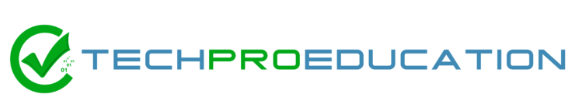

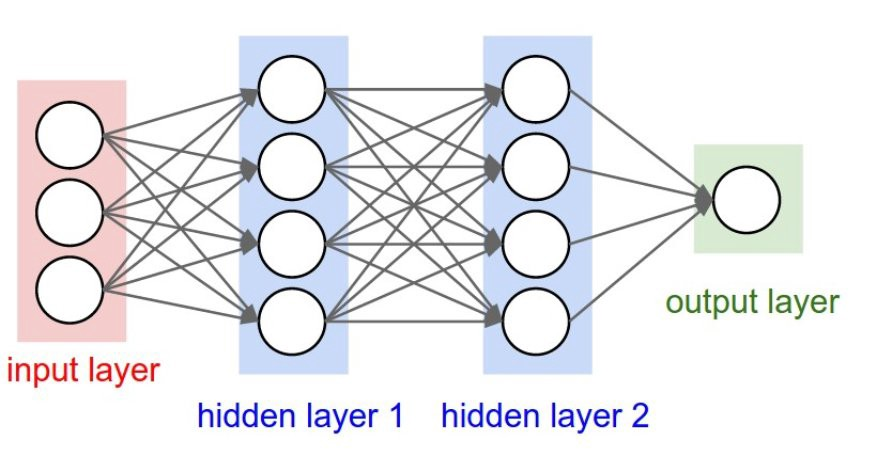

## Modelling

In [68]:
# pip install keras

In [69]:
import tensorflow as tf

In [70]:
from keras import models

In [71]:
from tensorflow.keras.layers import Dense, Activation

In [72]:
from tensorflow.keras.models import Sequential


In [73]:
help(Sequential) # arka arka katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [74]:
help(Dense) # katman (layer) cinsi ANN'de en temal katman Dense'dir. fulyconnected layer oluşturmak için Dense kulanılır.

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [75]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),   # her bir dense bir hidden layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),   # units kaç nöron olduğunu söyler fonksiyonuda Relu
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])                       #output layer

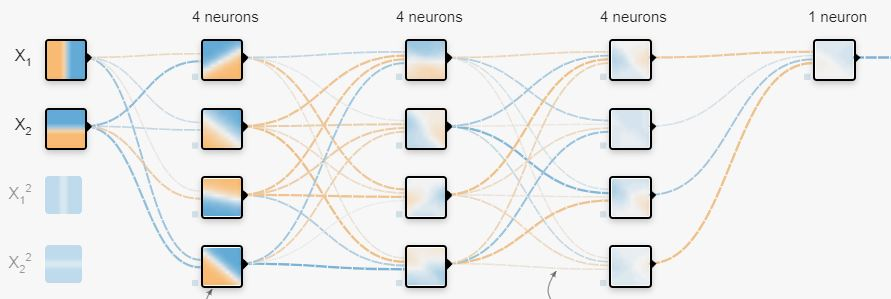

In [76]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))                       # regression problemi olduğu için 1 output var. 

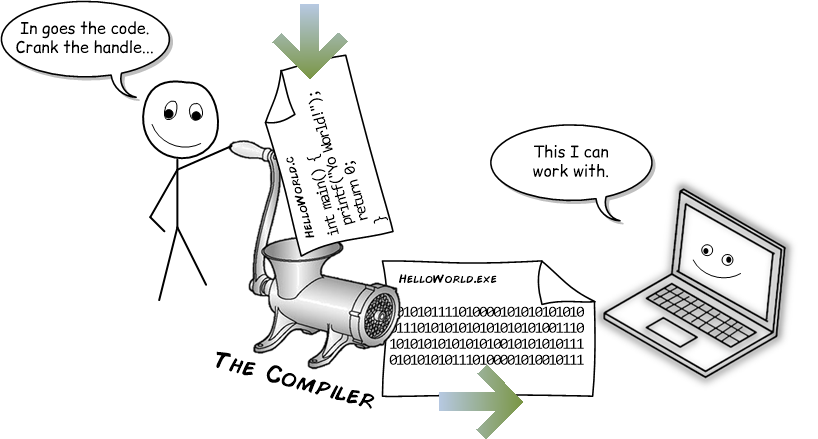

In [77]:
model.compile(optimizer = "rmsprop", loss = "mse") # son olarak compile edilir. model kuruldu bu model nasıl çalışacak onu burada belirleriz
# optimizer mincost bulur geriye doğru optimize eder. rmsprop veya adam kullanılablir
# loss : loss function, regression probleminde genelde mse kullanılır 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [78]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 300) #300 defa tüm datayı modele sokacak her iterasyonda 32 satır kullandı (batch_size 32) 32 satırın ortalama hata değerini Gradientdecent ile parametreleri backpropogation ile güncelledi bir somraki epoc bu değerler üzerinden train edilecek bütün epoc lar bitene  kadar devam edecek 
#loss değeri  o epoc un en sonuncu değerini verir 
# batch_size için tek tek verilebilir hızlı olur ama doğruluk oranı azalır, yüksek verirsek süre uzar doğruluk oranı artar.datanın tamamı olursa çok yavaş olur fakat çok doğru sonuçlar alınır.
# datanın büyüklüğü ve süreye göre ayarlanır.

Epoch 1/300
22/22 [==============================] - 1s 2ms/step - loss: 256723.5469
Epoch 2/300
22/22 [==============================] - 0s 2ms/step - loss: 256663.5000
Epoch 3/300
22/22 [==============================] - 0s 2ms/step - loss: 256589.0938
Epoch 4/300
22/22 [==============================] - 0s 2ms/step - loss: 256507.6562
Epoch 5/300
22/22 [==============================] - 0s 2ms/step - loss: 256416.7500
Epoch 6/300
22/22 [==============================] - 0s 2ms/step - loss: 256313.7656
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 256196.4375
Epoch 8/300
22/22 [==============================] - 0s 2ms/step - loss: 256061.5781
Epoch 9/300
22/22 [==============================] - 0s 2ms/step - loss: 255904.5938
Epoch 10/300
22/22 [==============================] - 0s 2ms/step - loss: 255722.6562
Epoch 11/300
22/22 [==============================] - 0s 2ms/step - loss: 255515.6094
Epoch 12/300
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 2058.3782
Epoch 97/300
22/22 [==============================] - 0s 2ms/step - loss: 2025.3118
Epoch 98/300
22/22 [==============================] - 0s 2ms/step - loss: 1992.0790
Epoch 99/300
22/22 [==============================] - 0s 2ms/step - loss: 1956.6766
Epoch 100/300
22/22 [==============================] - 0s 2ms/step - loss: 1922.4812
Epoch 101/300
22/22 [==============================] - 0s 2ms/step - loss: 1887.8575
Epoch 102/300
22/22 [==============================] - 0s 2ms/step - loss: 1853.8136
Epoch 103/300
22/22 [==============================] - 0s 2ms/step - loss: 1817.7736
Epoch 104/300
22/22 [==============================] - 0s 2ms/step - loss: 1785.6975
Epoch 105/300
22/22 [==============================] - 0s 2ms/step - loss: 1754.6616
Epoch 106/300
22/22 [==============================] - 0s 2ms/step - loss: 1721.2584
Epoch 107/300
22/22 [==============================] - 0s 2ms/step - loss: 1685.71

22/22 [==============================] - 0s 2ms/step - loss: 47.1675
Epoch 194/300
22/22 [==============================] - 0s 2ms/step - loss: 43.9327
Epoch 195/300
22/22 [==============================] - 0s 2ms/step - loss: 41.5544
Epoch 196/300
22/22 [==============================] - 0s 2ms/step - loss: 38.7880
Epoch 197/300
22/22 [==============================] - 0s 2ms/step - loss: 36.8740
Epoch 198/300
22/22 [==============================] - 0s 2ms/step - loss: 34.8961
Epoch 199/300
22/22 [==============================] - 0s 2ms/step - loss: 33.1937
Epoch 200/300
22/22 [==============================] - 0s 2ms/step - loss: 31.5493
Epoch 201/300
22/22 [==============================] - 0s 2ms/step - loss: 30.6852
Epoch 202/300
22/22 [==============================] - 0s 2ms/step - loss: 29.7269
Epoch 203/300
22/22 [==============================] - 0s 2ms/step - loss: 28.7946
Epoch 204/300
22/22 [==============================] - 0s 2ms/step - loss: 28.0129
Epoch 205/300
22/2

22/22 [==============================] - 0s 2ms/step - loss: 24.5221
Epoch 292/300
22/22 [==============================] - 0s 2ms/step - loss: 24.0614
Epoch 293/300
22/22 [==============================] - 0s 2ms/step - loss: 24.3401
Epoch 294/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2632
Epoch 295/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2615
Epoch 296/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2829
Epoch 297/300
22/22 [==============================] - 0s 2ms/step - loss: 24.1318
Epoch 298/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4914
Epoch 299/300
22/22 [==============================] - 0s 2ms/step - loss: 24.2632
Epoch 300/300
22/22 [==============================] - 0s 2ms/step - loss: 24.4939


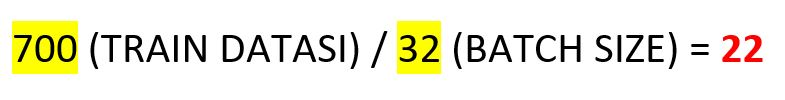

In [79]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


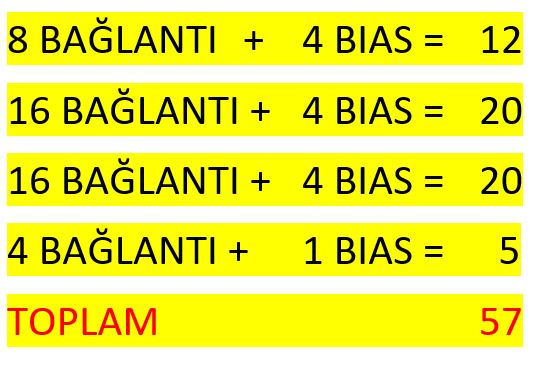

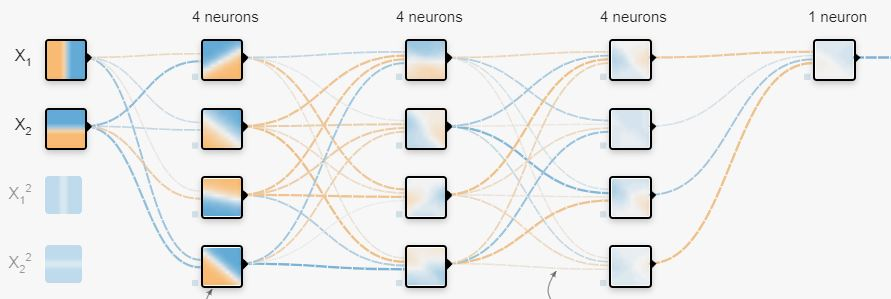

In [80]:
model.weights # eğitim sonrası ağırlık değerleri

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 1.0545325 ,  2.4579103 ,  0.14715461,  1.7980827 ],
        [ 3.8739958 ,  3.920196  , -0.08732661,  2.19904   ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.8559923 ,  0.80263823, -0.11331274,  0.32299456], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.8917153 , -0.03193676,  2.8670483 ,  3.161776  ],
        [ 1.8400338 , -0.7937997 ,  2.274183  ,  2.992303  ],
        [-0.7380983 , -0.08760756, -0.5202767 ,  0.73545235],
        [ 1.7088734 , -0.17868519,  1.2401493 ,  2.5914793 ]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0.78573394, 0.        , 0.856316  , 0.78633523], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.6022237 ,  2.438317  , -0.5065634 ,  0.4584157 ],
        [ 0.19324476,  0.50857526, 

In [81]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [256723.546875,
  256663.5,
  256589.09375,
  256507.65625,
  256416.75,
  256313.765625,
  256196.4375,
  256061.578125,
  255904.59375,
  255722.65625,
  255515.609375,
  255281.9375,
  255022.109375,
  254730.1875,
  254407.71875,
  254051.203125,
  253656.953125,
  253224.875,
  252753.390625,
  252239.984375,
  251674.96875,
  251066.71875,
  250403.296875,
  249683.90625,
  248909.484375,
  248073.71875,
  247164.828125,
  246184.34375,
  245133.828125,
  243989.171875,
  242756.234375,
  241434.375,
  240017.46875,
  238515.8125,
  236906.484375,
  235190.03125,
  233374.859375,
  231445.46875,
  229407.5625,
  227239.953125,
  224965.46875,
  222561.421875,
  220029.890625,
  217382.625,
  214590.46875,
  211659.75,
  208615.15625,
  205430.0625,
  202100.015625,
  198606.265625,
  194985.53125,
  191223.9375,
  187327.484375,
  183297.53125,
  179119.640625,
  174779.65625,
  170335.953125,
  165726.5625,
  160999.265625,
  156122.015625,
  151136.65625,
  146021.0468

In [82]:
pd.DataFrame(model.history.history)

,loss
0,256723.547
1,256663.500
2,256589.094
3,256507.656
4,256416.750
...,...
295,24.283
296,24.132
297,24.491
298,24.263


<AxesSubplot:>

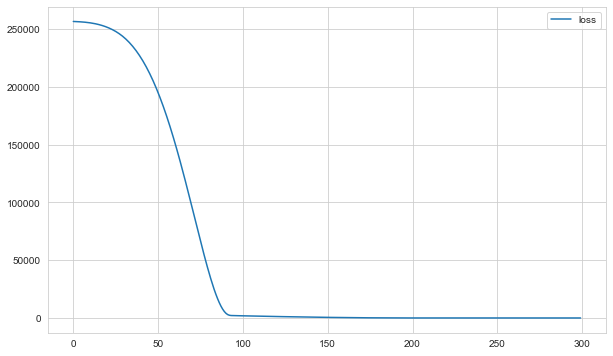

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

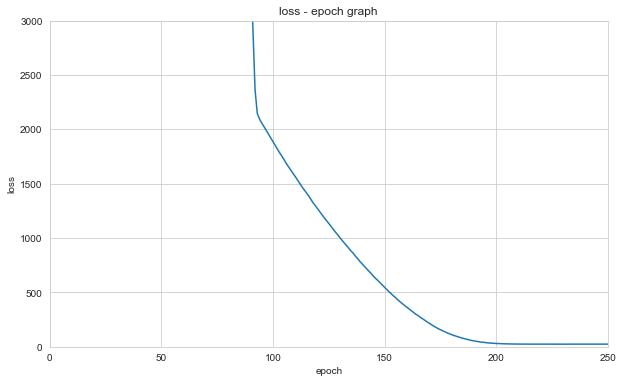

In [84]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

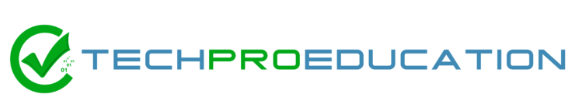

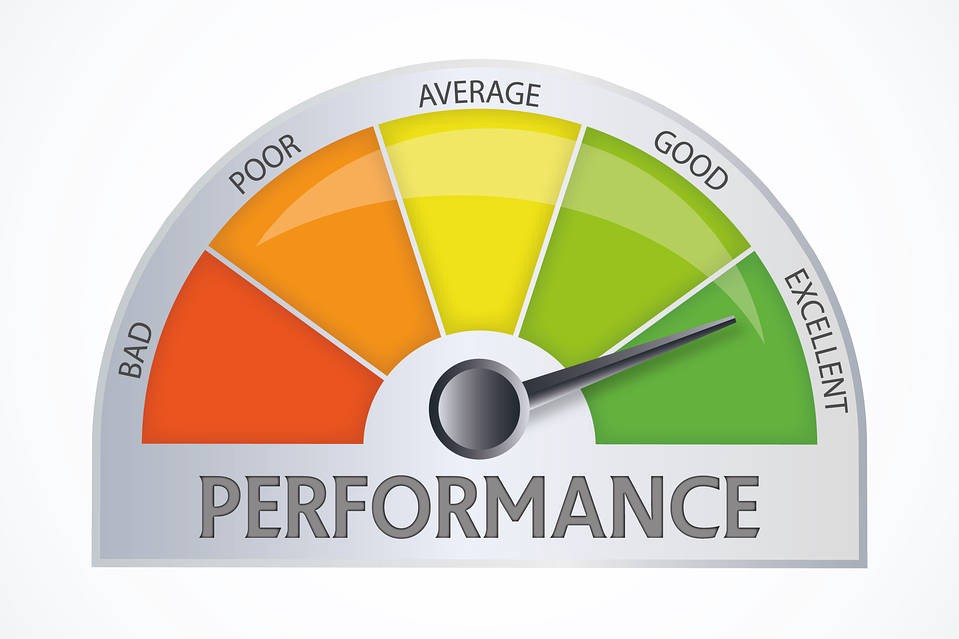

## Model Performance

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [86]:
model.evaluate(X_train, y_train, verbose=0) # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

24.033267974853516

In [87]:
model.evaluate(X_test, y_test, verbose=0)

25.933120727539062

In [88]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [89]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.9971539870641759

In [90]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız
#büyük datalarda  milyonluk datalarda DL modeller tercih edilir 

,Actual,Pred
56,624.993,629.031
6,514.406,515.907
63,397.621,403.950
190,433.423,438.522
22,375.138,383.143
265,320.228,314.521
194,361.426,357.945
228,627.640,629.391
0,402.296,405.967
285,543.324,543.930


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

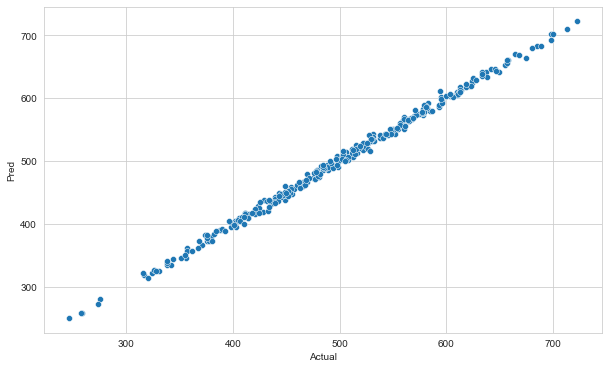

In [91]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [92]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [93]:
eval_metric(y_test, y_pred)

r2_score: 0.9970503836587711 
mae: 4.116073679075439 
mse: 25.933120272903817 
rmse: 5.0924571940178165


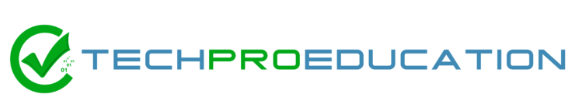

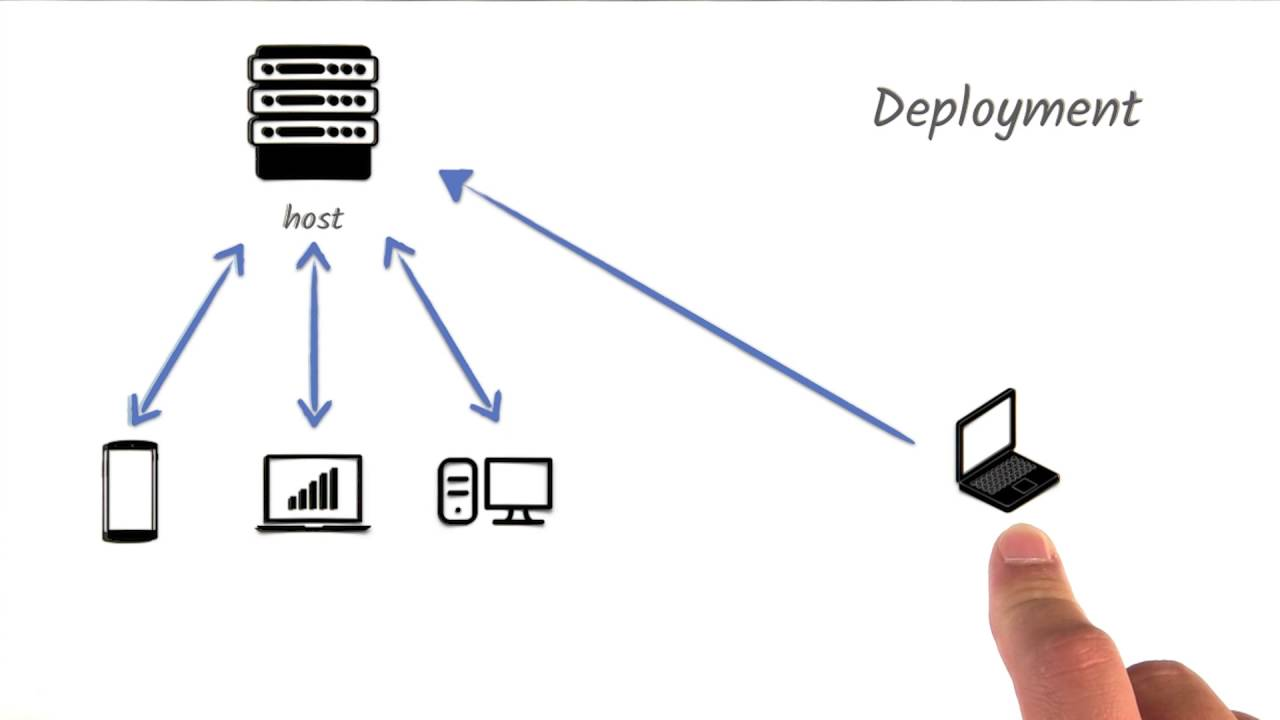

## Final Model and Model Deployment

In [94]:
scaler = MinMaxScaler().fit(X)

In [95]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [96]:
X_scaled = scaler.transform(X)

In [97]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 257309.5938
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 257084.3750
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 256816.7812
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 256382.6562
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 255857.5312
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 255251.1250
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 254565.3594
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 253774.5469
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 252871.3281
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 251827.5625
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 250634.6562
Epoch 12/200
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 854.4487
Epoch 98/200
32/32 [==============================] - 0s 2ms/step - loss: 814.3456
Epoch 99/200
32/32 [==============================] - 0s 2ms/step - loss: 777.5775
Epoch 100/200
32/32 [==============================] - 0s 2ms/step - loss: 741.2818
Epoch 101/200
32/32 [==============================] - 0s 2ms/step - loss: 703.6123
Epoch 102/200
32/32 [==============================] - 0s 2ms/step - loss: 671.4134
Epoch 103/200
32/32 [==============================] - 0s 2ms/step - loss: 635.2660
Epoch 104/200
32/32 [==============================] - 0s 2ms/step - loss: 602.9612
Epoch 105/200
32/32 [==============================] - 0s 2ms/step - loss: 564.5374
Epoch 106/200
32/32 [==============================] - 0s 2ms/step - loss: 533.1727
Epoch 107/200
32/32 [==============================] - 0s 2ms/step - loss: 498.6447
Epoch 108/200
32/32 [==============================] - 0s 2ms/step - loss: 464.7977
Epoch 10

32/32 [==============================] - 0s 2ms/step - loss: 24.5695
Epoch 196/200
32/32 [==============================] - 0s 2ms/step - loss: 24.9472
Epoch 197/200
32/32 [==============================] - 0s 2ms/step - loss: 25.0384
Epoch 198/200
32/32 [==============================] - 0s 2ms/step - loss: 24.8596
Epoch 199/200
32/32 [==============================] - 0s 2ms/step - loss: 24.9787
Epoch 200/200
32/32 [==============================] - 0s 2ms/step - loss: 24.6777


H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [98]:
final_model.save('model_fake.h5')  # creates a HDF5 file 'my_model.h5'

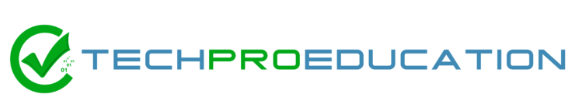

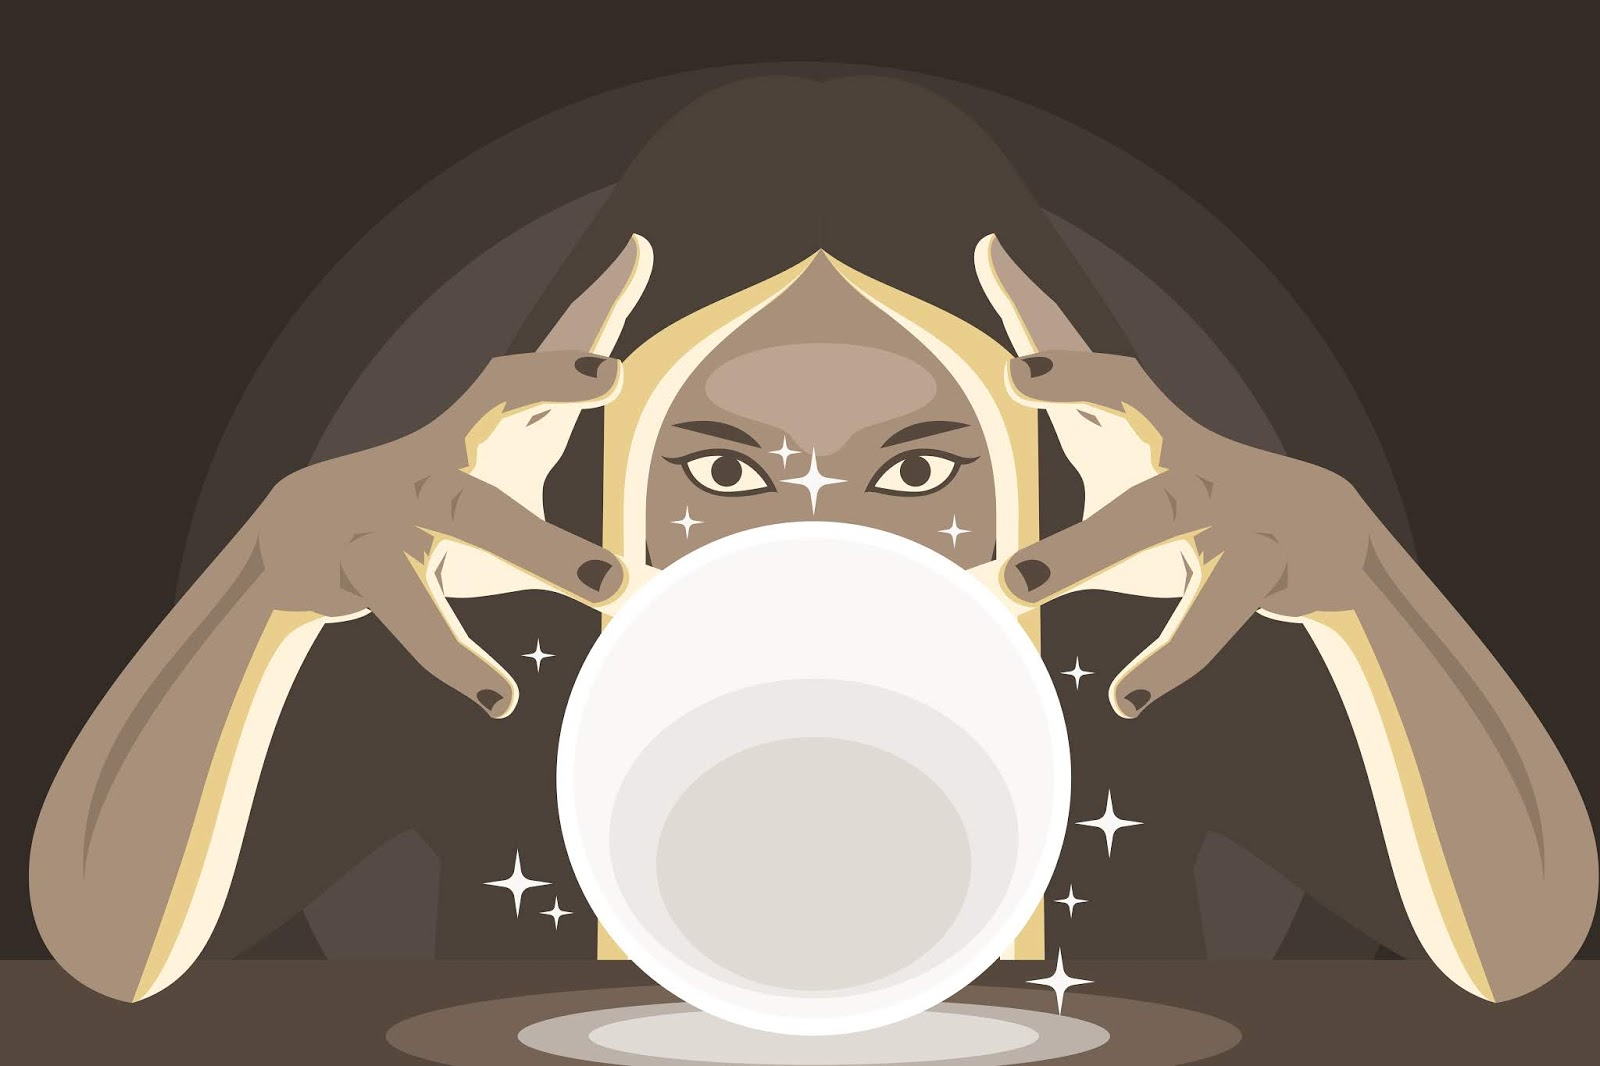

## Prediction-1

In [99]:
from tensorflow.keras.models import load_model # modeli  yükleriz 

In [102]:
model_fake_reg = load_model('model_fake.h5')

In [103]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [104]:
sample = [[998, 1000]]

In [105]:
sample_scaled = scaler_fake_reg.transform(sample)

In [106]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 116ms/step


array([[420.87363]], dtype=float32)

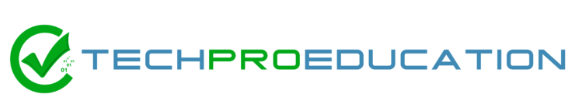

## Prediction-2

In [107]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],  # birden fazla değerrleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 996]}   # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok

In [108]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [109]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [110]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 24ms/step


array([[380.65005],
       [332.1677 ],
       [283.68527],
       [235.2029 ],
       [186.72052]], dtype=float32)

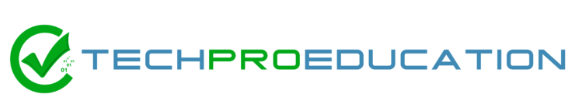